In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import  GridSearchCV
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import shap

In [2]:
loan_df=pd.read_csv("credit_train.csv")

In [3]:
print(loan_df.dtypes)

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


In [4]:
loan_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [5]:
loan_df.shape

(100514, 19)

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [7]:
loan_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [8]:
loan_df['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [9]:
loan_df['Loan Status']=loan_df['Loan Status'].map({'Fully Paid':int('1'), "Charged Off":int('0')})

In [10]:
loan_df['Loan Status'].value_counts()

1.0    77361
0.0    22639
Name: Loan Status, dtype: int64

In [11]:
loan_df['Term'].value_counts()

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

In [12]:
loan_df['Term']=loan_df['Term'].map({'Short Term':int('0'), 'Long Term':int('1')})

In [13]:
loan_df['Term'].value_counts()

0.0    72208
1.0    27792
Name: Term, dtype: int64

In [14]:
loan_df['Years in current job'].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

In [15]:
loan_df['Years in current job']=loan_df['Years in current job'].map({'10+ years':int('0'), '2 years':int('1'),
                                                                     '3 years ':int('2'), '< 1 year':int('3'),
                                                                     '5 years ':int('4'), '1 year ':int('5'),
                                                                    '4 years':int('6'), '6 years':int('7'),
                                                                    '7 years':int('8'), '8 years':int('9'),
                                                                    '9 years':int('10')})

In [16]:
loan_df['Years in current job'].value_counts()

0.0     31121
1.0      9134
3.0      8164
6.0      6143
7.0      5686
8.0      5577
9.0      4582
10.0     3955
Name: Years in current job, dtype: int64

In [17]:
loan_df['Home Ownership'].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [18]:
loan_df['Home Ownership']=loan_df['Home Ownership'].map({'Home Mortgage':int('0'), 'Rent':int('1'), 'Own Home':int('2')
                                                        , 'HaveMortgage':int('3')})

In [19]:
loan_df['Home Ownership'].value_counts()

0.0    48410
1.0    42194
2.0     9182
3.0      214
Name: Home Ownership, dtype: int64

In [20]:
loan_df['Purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [21]:
loan_df['Purpose']=loan_df['Purpose'].map({'Debt Consolidation':int('0'), 'other':int('1'),
                                                                     'Home Improvements':int('2'), 'Other':int('1'),
                                                                     'Business Loan':int('3'), 'Buy a Car':int('4'),
                                                                    'Medical Bills':int('5'), 'Buy House':int('6'),
                                                                    'Take a Trip':int('7'), 'major_purchase':int('8'),
                                                                        'small_business':int('9'),'moving':int('10'),
                                          'wedding':int('11'), 'vacation':int('12'), 'Educational Expenses':int('13')
                                              , 'renewable_energy':int('14')})

In [22]:
loan_df['Purpose'].value_counts()

0.0     78552
1.0      9287
2.0      5839
3.0      1569
4.0      1265
5.0      1127
6.0       678
7.0       573
8.0       352
9.0       283
10.0      150
11.0      115
12.0      101
13.0       99
14.0       10
Name: Purpose, dtype: int64

In [23]:
loan_train=loan_df.drop({"Loan ID", "Customer ID","Months since last delinquent"}, axis=1)

In [24]:
loan_train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1.0,445412.0,0.0,709.0,1167493.0,9.0,0.0,2.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1.0,262328.0,0.0,NaN,NaN,0.0,0.0,0.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1.0,99999999.0,0.0,741.0,2231892.0,9.0,2.0,0.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1.0,347666.0,1.0,721.0,806949.0,NaN,2.0,0.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1.0,176220.0,0.0,NaN,NaN,NaN,1.0,0.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [25]:
loan_train.isnull().sum()

Loan Status                    514
Current Loan Amount            514
Term                           514
Credit Score                 19668
Annual Income                19668
Years in current job         26152
Home Ownership                 514
Purpose                        514
Monthly Debt                   514
Years of Credit History        514
Number of Open Accounts        514
Number of Credit Problems      514
Current Credit Balance         514
Maximum Open Credit            516
Bankruptcies                   718
Tax Liens                      524
dtype: int64

In [26]:
loan_train=loan_train.dropna(axis=0)

In [27]:
loan_train.shape

(60046, 16)

In [28]:
loan_train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1.0,445412.0,0.0,709.0,1167493.0,9.0,0.0,2.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,1.0,99999999.0,0.0,741.0,2231892.0,9.0,2.0,0.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
5,0.0,206602.0,0.0,7290.0,896857.0,0.0,0.0,0.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,1.0,217646.0,0.0,730.0,1184194.0,3.0,0.0,0.0,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
8,1.0,548746.0,0.0,678.0,2559110.0,1.0,1.0,0.0,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0


In [29]:
loan_train.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [30]:
x= loan_train.drop(['Loan Status' ] , axis=1)
y = loan_train['Loan Status'].values

In [31]:
print(x.shape)
print(y.shape)

(60046, 15)
(60046,)


In [32]:
Smote = SMOTE(random_state = 42)
xresample, yresample = Smote.fit_resample(x,y)

In [33]:
x_train , x_test , y_train , y_test = train_test_split(xresample , yresample , test_size= 0.25 , random_state= 42)

In [34]:
print(x_train.shape , x_test.shape, y_train.shape, y_test.shape)

(71187, 15) (23729, 15) (71187,) (23729,)


In [35]:
print(sum(y_test==1))
print(sum(y_test==0))

11860
11869


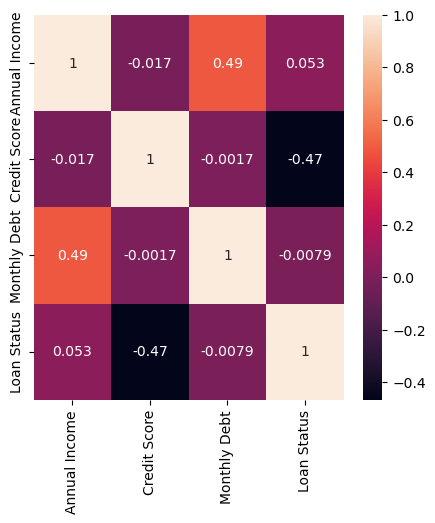

In [36]:
fig = plt.figure(figsize = (5,5))
#Pearson Correlation Matrix
sns.heatmap(loan_df[['Annual Income','Credit Score','Monthly Debt','Loan Status']].corr(),annot=True);

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:title={'center':'pie chart of loan status'}, ylabel='Loan Status'>

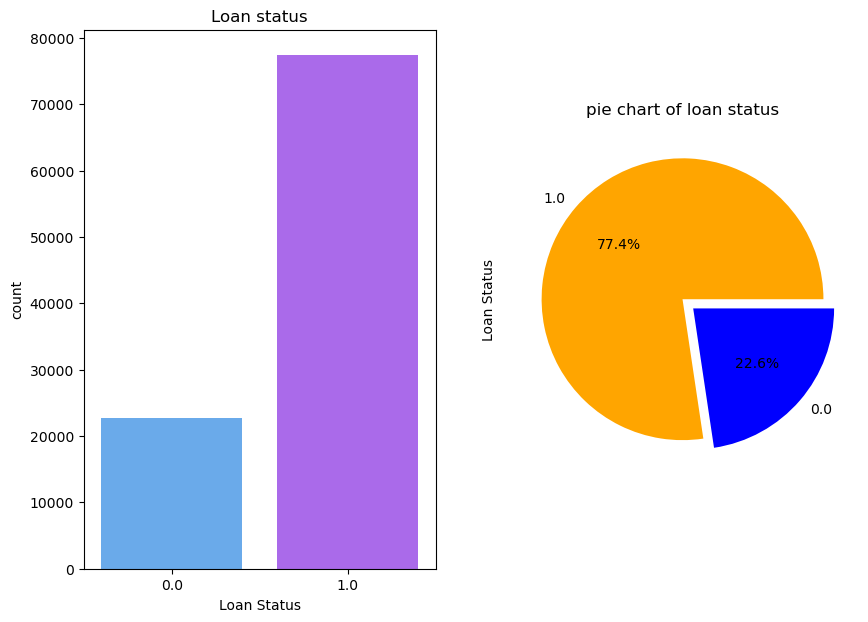

In [37]:
plt.subplot(1,2,1)
sns.countplot(loan_df['Loan Status'],palette = 'cool')
plt.title("Loan status")

plt.subplot(1,2,2)
count = loan_df['Loan Status'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',   colors=['orange', 'blue'], figsize= (10,7), explode= [0,0.1], title = "pie chart of loan status")

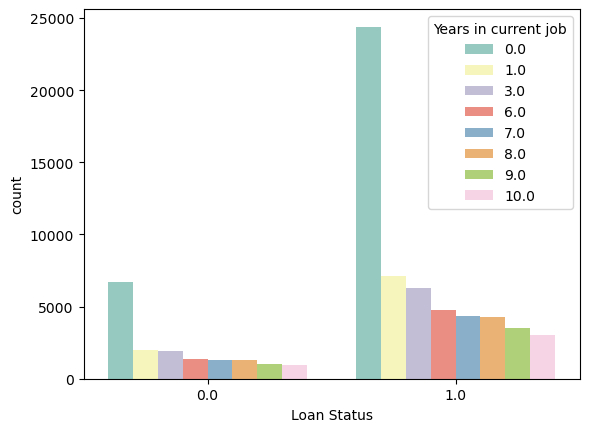

In [38]:
ax = sns.countplot(x="Loan Status", data=loan_df,hue="Years in current job",palette="Set3")

## Decision Tree Model

In [39]:
dt = DecisionTreeClassifier()

In [40]:
parameters = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 3, 4, 5]}
clf = GridSearchCV(dt, parameters, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 4, 5]})

In [41]:
y_pred_dt = clf.predict(x_test)
report = classification_report(y_test, y_pred_dt)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     11869
         1.0       0.77      0.98      0.86     11860

    accuracy                           0.84     23729
   macro avg       0.87      0.84      0.84     23729
weighted avg       0.87      0.84      0.84     23729



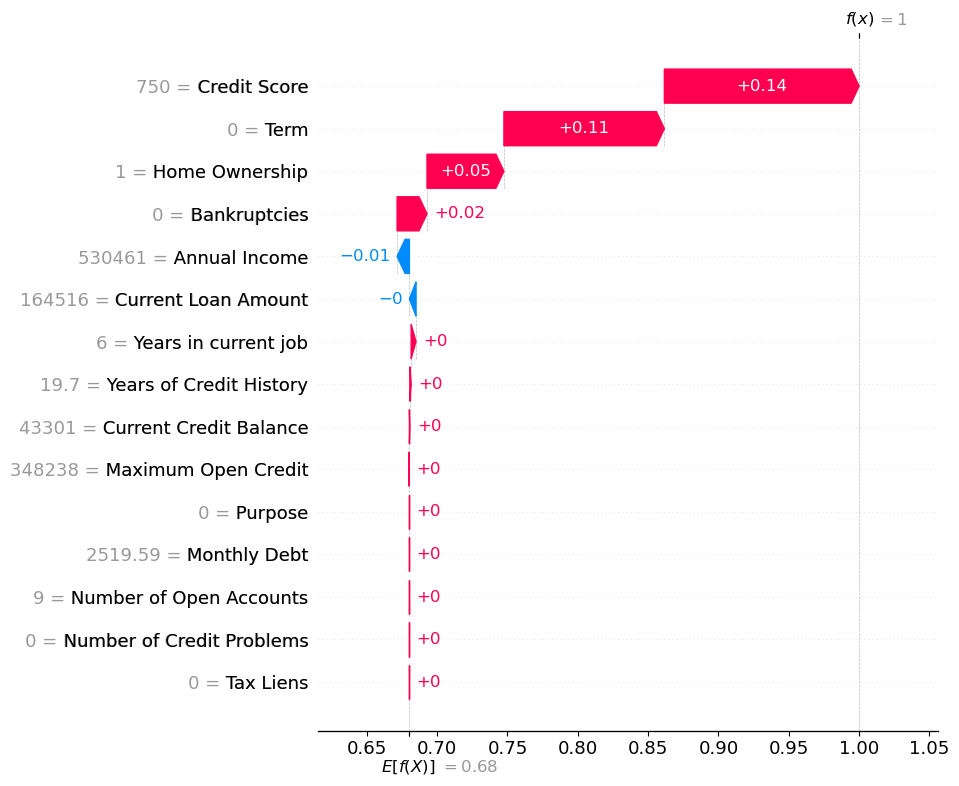

                      feature  contribution  base_value
0         Current Loan Amount     -0.004688        0.68
1                        Term      0.114063        0.68
2                Credit Score      0.138437        0.68
3               Annual Income     -0.008750        0.68
4        Years in current job      0.003438        0.68
5              Home Ownership      0.054687        0.68
6                     Purpose      0.000000        0.68
7                Monthly Debt      0.000000        0.68
8     Years of Credit History      0.000938        0.68
9     Number of Open Accounts      0.000000        0.68
10  Number of Credit Problems      0.000000        0.68
11     Current Credit Balance      0.000313        0.68
12        Maximum Open Credit      0.000313        0.68
13               Bankruptcies      0.021250        0.68
14                  Tax Liens      0.000000        0.68


In [42]:
explainer_dt = shap.Explainer(clf.predict, x_test[1:500])
shap_values_dt = explainer_dt(x_test[1:500])
shap.waterfall_plot(shap_values_dt[165], max_display=20)

# extract the data used to create the plot
feature_names_dt = shap_values_dt.feature_names
contribution_dt = shap_values_dt.values[165]
base_value_dt = shap_values_dt.base_values[165]

# create a pandas DataFrame
data_dt = {
    'feature': feature_names_dt,
    'contribution': contribution_dt,
    'base_value': base_value_dt
}
df_dt = pd.DataFrame(data_dt)
print(df_dt)





In [43]:
total_contribution_dt=np.sum(contribution_dt)
print(total_contribution_dt)

0.31999999999999995


In [44]:
predicted_value_dt=base_value_dt + total_contribution_dt
print(predicted_value_dt)

1.0


In [45]:
result=[]
result_max=[]
result_feature=[]
if(predicted_value_dt <=0):
    min_3_values = df_dt.nsmallest(3, 'contribution')
    max_values = df_dt.nlargest(1, 'contribution')
    
    selected_value=min_3_values[['feature', 'contribution']]
    df_selected=pd.DataFrame(selected_value)

    
    df_selected['percentage']= df_selected['contribution'].apply(lambda x:(x/total_contribution_dt) * 100)
    print(df_selected)
    
    condition = df_selected.loc[df_selected['percentage'] >=10]
    
    for index, row in condition.iterrows():
        feature_variables=row['feature']
        result.append(feature_variables)
        
    for index, row in max_values.iterrows():
        feature_variable=row['feature']
        result_max.append(feature_variable)

    print('\n')   
    print("We are sorry to inform you that you are not elligible for the loan at the moment")
    print(f"Though you are having a good {result_max[0]}")
    print("Due to the following issues your loan got rejected:",',' .join([str(lst) for lst in result]))
    print("If you have any questions or concerns about our decision, please do not hesitate to reach out to us.")
    
else:
    max_3_values = df_dt.nlargest(3, 'contribution')
    
    selected_value=max_3_values[['feature', 'contribution']]
   
    df_selected_max=pd.DataFrame(selected_value)
    df_selected_max['percentage']= df_selected_max['contribution'].apply(lambda x:(x/total_contribution_dt) * 100)
    print(df_selected_max)

    for index, row in max_3_values.iterrows():
        feature_variables=row['feature']
        result.append(feature_variables)
        
    print('\n')    
    print("Congrats You are eligible for the loan !")
    print("There are severable factors which makes this possible such as:",',' .join([str(lst) for lst in result]))
    


          feature  contribution  percentage
2    Credit Score      0.138437   43.261719
1            Term      0.114063   35.644531
5  Home Ownership      0.054687   17.089844


Congrats You are eligible for the loan !
There are severable factors which makes this possible such as: Credit Score,Term,Home Ownership


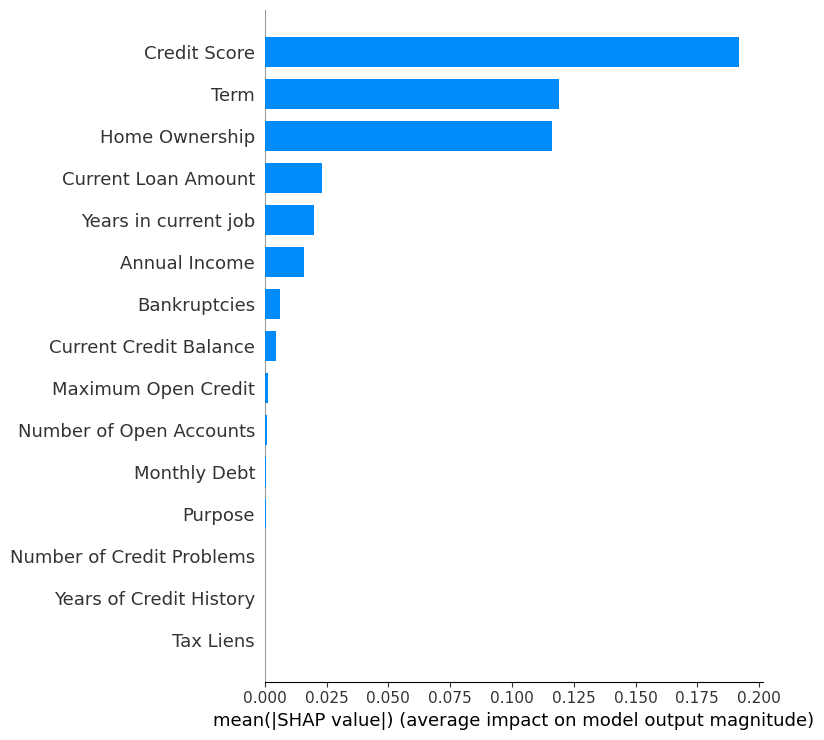

In [46]:
shap.summary_plot(shap_values_dt, x_test, plot_type="bar")

## Random Forest Model

In [47]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10,min_samples_leaf=5, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf =rf.predict(x_test)

In [48]:
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84     11869
         1.0       0.79      0.99      0.88     11860

    accuracy                           0.86     23729
   macro avg       0.89      0.86      0.86     23729
weighted avg       0.89      0.86      0.86     23729



Permutation explainer: 500it [02:07,  3.61it/s]                                 


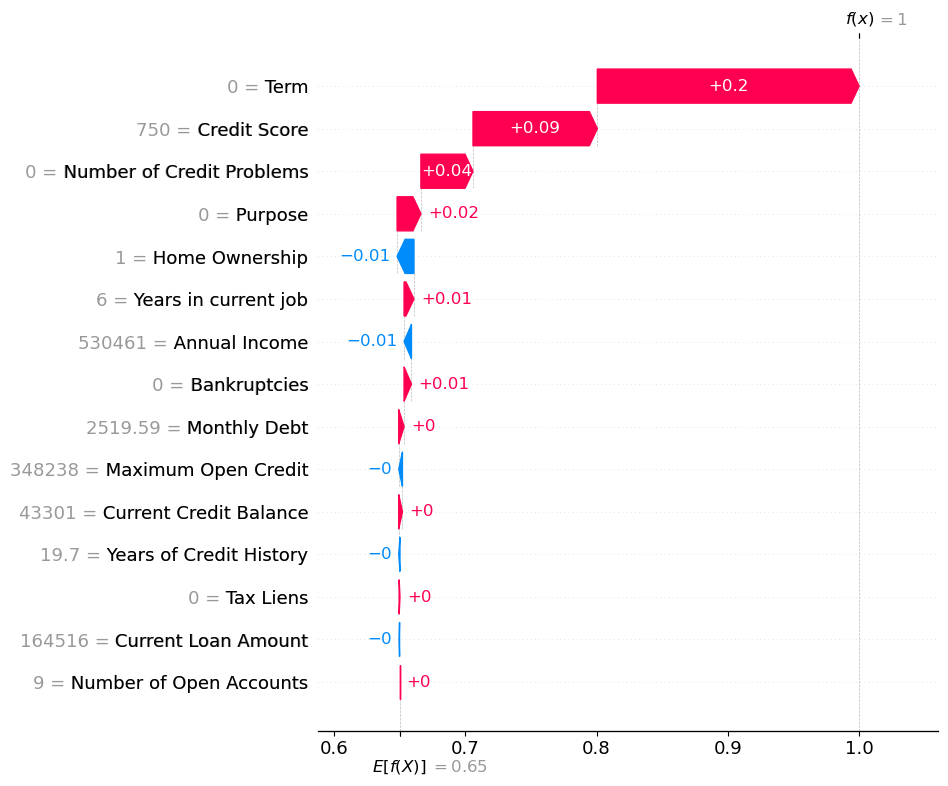

                      feature  contribution  base_value
0         Current Loan Amount     -0.000313        0.65
1                        Term      0.199375        0.65
2                Credit Score      0.094687        0.65
3               Annual Income     -0.005625        0.65
4        Years in current job      0.007500        0.65
5              Home Ownership     -0.012812        0.65
6                     Purpose      0.018125        0.65
7                Monthly Debt      0.004063        0.65
8     Years of Credit History     -0.000938        0.65
9     Number of Open Accounts      0.000000        0.65
10  Number of Credit Problems      0.039688        0.65
11     Current Credit Balance      0.002812        0.65
12        Maximum Open Credit     -0.002813        0.65
13               Bankruptcies      0.005625        0.65
14                  Tax Liens      0.000625        0.65


In [49]:
explainer_rf = shap.Explainer(rf.predict, x_test[1:500])
shap_values_rf = explainer_rf(x_test[1:500])
shap.waterfall_plot(shap_values_rf[165], max_display=20)

# extract the data used to create the plot
feature_names_rf = shap_values_rf.feature_names
contribution_rf = shap_values_rf.values[165]
base_value_rf = shap_values_rf.base_values[165]

# create a pandas DataFrame
data_rf = {
    'feature': feature_names_rf,
    'contribution': contribution_rf,
    'base_value': base_value_rf
}
df_rf = pd.DataFrame(data_rf)
print(df_rf)

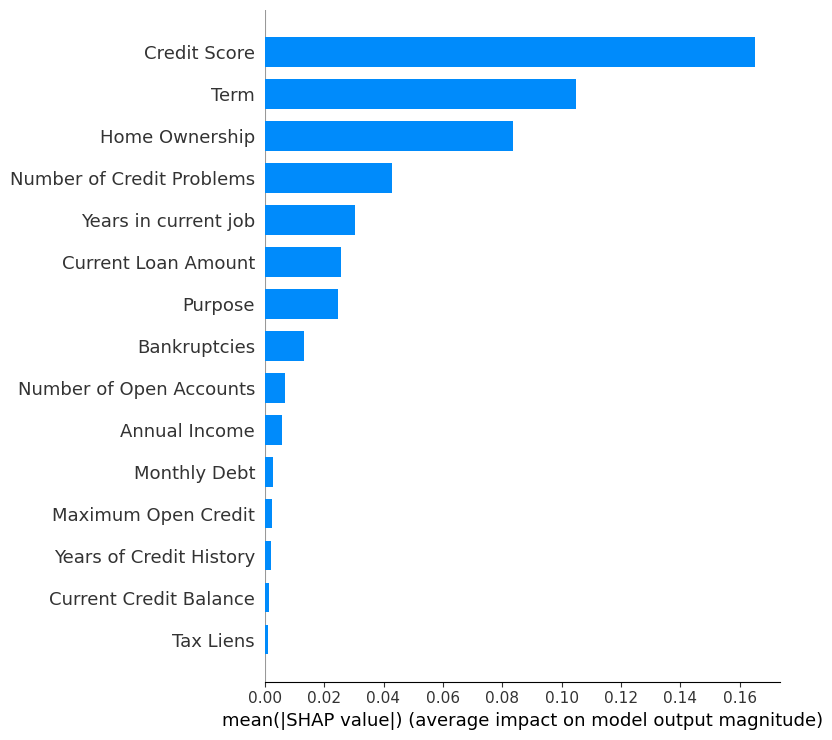

In [50]:
shap.summary_plot(shap_values_rf, x_test, plot_type="bar")

In [51]:
total_contribution_rf=np.sum(contribution_rf)
print(total_contribution_rf)

0.35


In [52]:
predicted_value_rf=base_value_rf + total_contribution_rf
print(predicted_value_rf)

1.0


## KNeighborsClassifier Model

In [53]:
knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [54]:
report = classification_report(y_test, y_pred_knn)
print(report)

              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83     11869
         1.0       0.90      0.71      0.79     11860

    accuracy                           0.81     23729
   macro avg       0.83      0.81      0.81     23729
weighted avg       0.83      0.81      0.81     23729



Permutation explainer: 500it [06:42,  1.21it/s]                                 


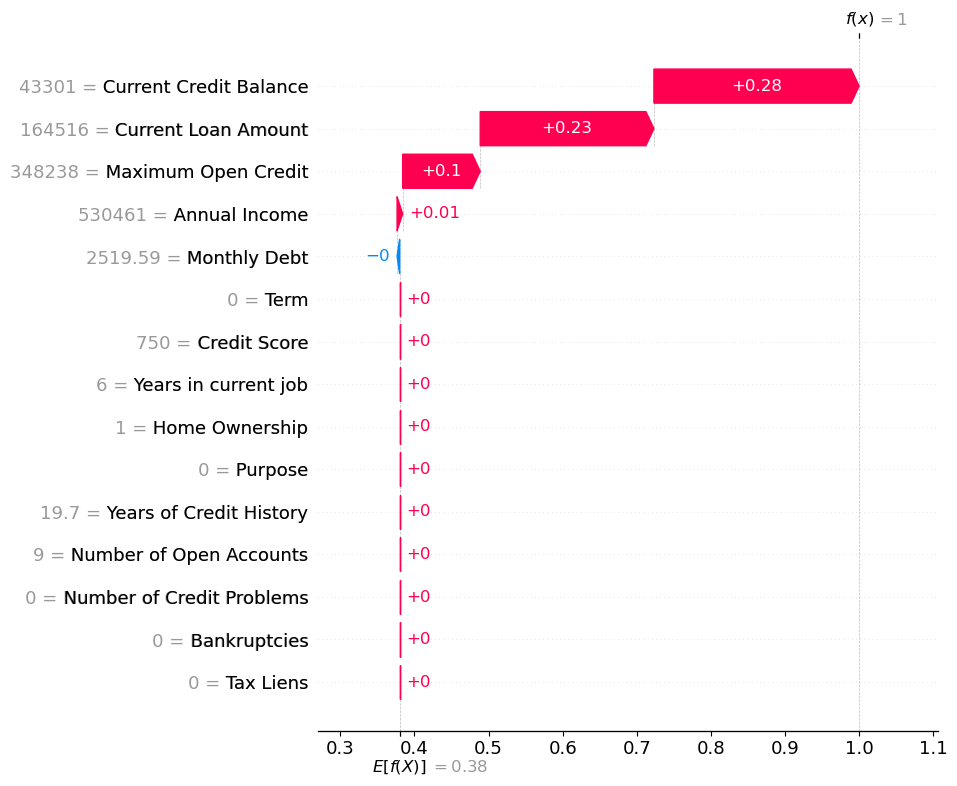

                      feature  contribution  base_value
0         Current Loan Amount      0.234375        0.38
1                        Term      0.000000        0.38
2                Credit Score      0.000000        0.38
3               Annual Income      0.007500        0.38
4        Years in current job      0.000000        0.38
5              Home Ownership      0.000000        0.38
6                     Purpose      0.000000        0.38
7                Monthly Debt     -0.003437        0.38
8     Years of Credit History      0.000000        0.38
9     Number of Open Accounts      0.000000        0.38
10  Number of Credit Problems      0.000000        0.38
11     Current Credit Balance      0.276875        0.38
12        Maximum Open Credit      0.104688        0.38
13               Bankruptcies      0.000000        0.38
14                  Tax Liens      0.000000        0.38


In [55]:
explainer_knn = shap.Explainer(knn.predict, x_test[1:500])
shap_values_knn = explainer_knn(x_test[1:500])
shap.waterfall_plot(shap_values_knn[165], max_display=20)

# extract the data used to create the plot
feature_names_knn = shap_values_knn.feature_names
contribution_knn = shap_values_knn.values[165]
base_value_knn = shap_values_knn.base_values[165]

# create a pandas DataFrame
data_knn = {
    'feature': feature_names_knn,
    'contribution': contribution_knn,
    'base_value': base_value_knn
}
df_knn = pd.DataFrame(data_knn)
print(df_knn)

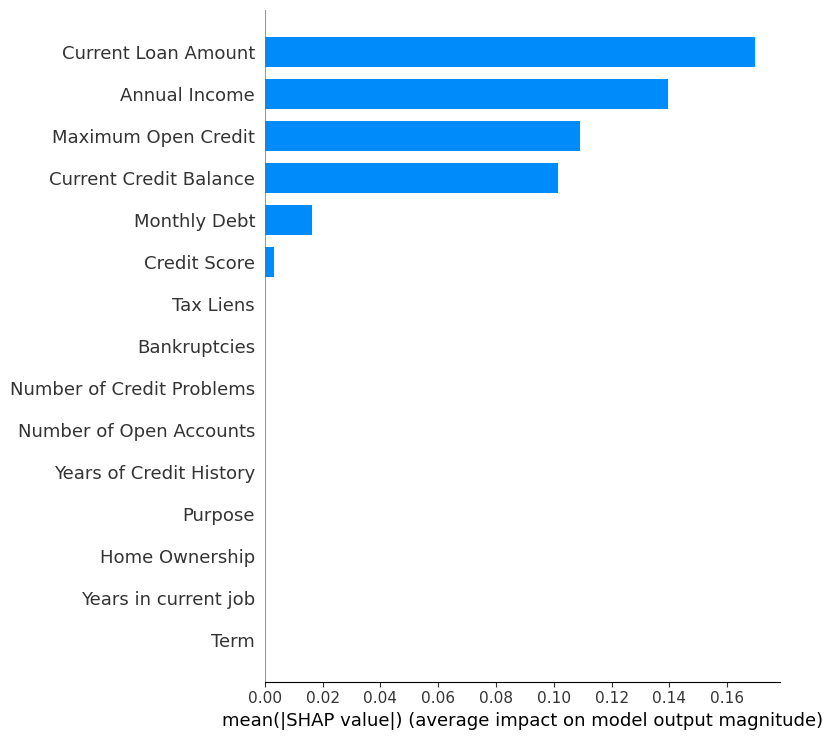

In [56]:
shap.summary_plot(shap_values_knn, x_test, plot_type="bar")

In [57]:
total_contribution_knn=np.sum(contribution_knn)
print(total_contribution_knn)

0.6200000000000001


In [58]:
predicted_value_knn=base_value_knn + total_contribution_knn
print(predicted_value_knn)

1.0


## LogisticRegression Model

In [59]:
lr= LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [60]:
report = classification_report(y_test, y_pred_lr)
print(report)

              precision    recall  f1-score   support

         0.0       0.65      0.75      0.70     11869
         1.0       0.71      0.59      0.64     11860

    accuracy                           0.67     23729
   macro avg       0.68      0.67      0.67     23729
weighted avg       0.68      0.67      0.67     23729



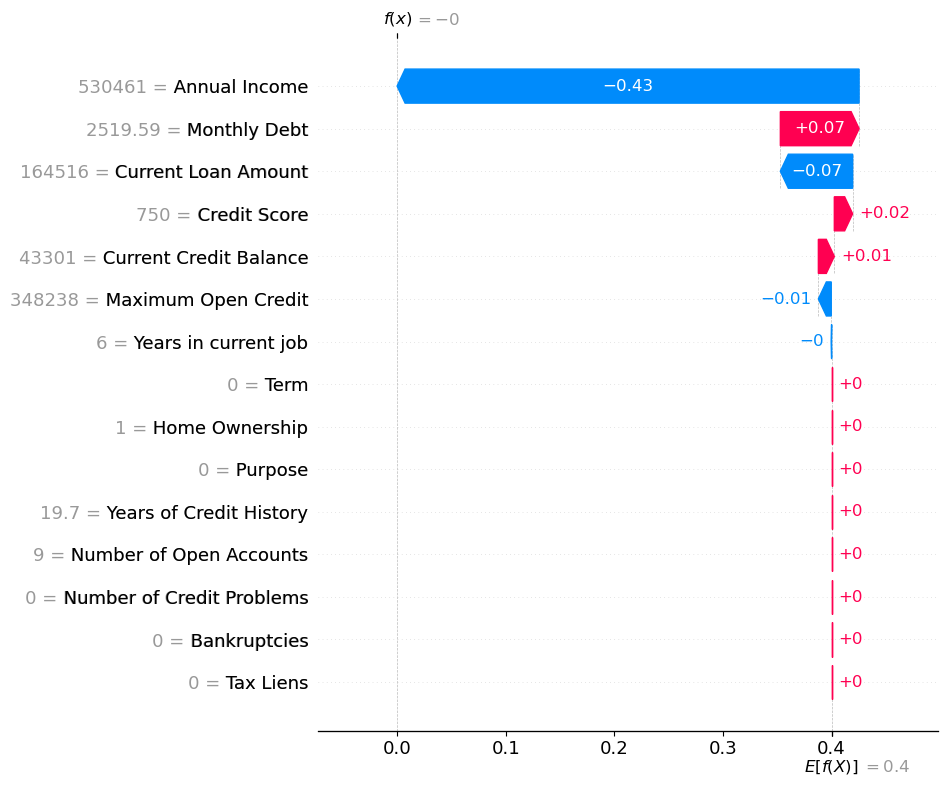

                      feature  contribution  base_value
0         Current Loan Amount     -0.066563         0.4
1                        Term      0.000000         0.4
2                Credit Score      0.016875         0.4
3               Annual Income     -0.425313         0.4
4        Years in current job     -0.000313         0.4
5              Home Ownership      0.000000         0.4
6                     Purpose      0.000000         0.4
7                Monthly Debt      0.072500         0.4
8     Years of Credit History      0.000000         0.4
9     Number of Open Accounts      0.000000         0.4
10  Number of Credit Problems      0.000000         0.4
11     Current Credit Balance      0.014687         0.4
12        Maximum Open Credit     -0.011875         0.4
13               Bankruptcies      0.000000         0.4
14                  Tax Liens      0.000000         0.4


In [61]:
explainer_lr = shap.Explainer(lr.predict, x_test[1:500])
shap_values_lr = explainer_lr(x_test[1:500])
shap.waterfall_plot(shap_values_lr[165], max_display=20)

# extract the data used to create the plot
feature_names_lr = shap_values_lr.feature_names
contribution_lr = shap_values_lr.values[165]
base_value_lr = shap_values_lr.base_values[165]

# create a pandas DataFrame
data_lr = {
    'feature': feature_names_lr,
    'contribution': contribution_lr,
    'base_value': base_value_lr
}
df_lr = pd.DataFrame(data_lr)
print(df_lr)

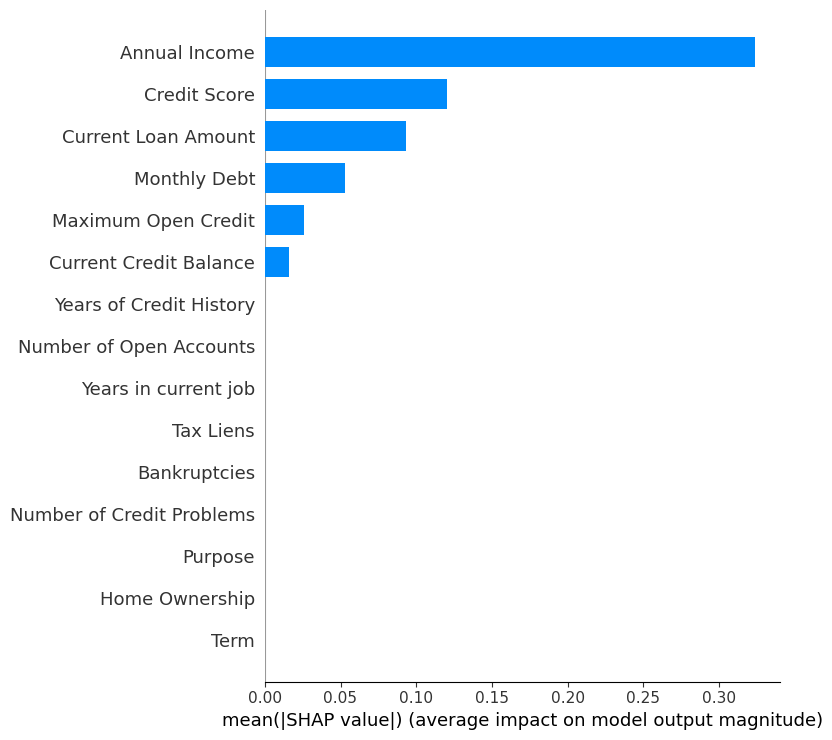

In [62]:
shap.summary_plot(shap_values_lr, x_test, plot_type="bar")

In [63]:
total_contribution_lr=np.sum(contribution_lr)
print(total_contribution_lr)

-0.40000000000000013


In [64]:
predicted_value_lr=base_value_lr + total_contribution_lr
print(predicted_value_lr)

-1.1102230246251565e-16


## XGBClassifier

In [65]:
xgb = xgb.XGBClassifier(
    learning_rate=0.7,
    max_depth=5,
    n_estimators=100,
    objective='binary:logistic',
    random_state=42
)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [66]:
report = classification_report(y_test, y_pred_xgb)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88     11869
         1.0       0.84      0.97      0.90     11860

    accuracy                           0.89     23729
   macro avg       0.90      0.89      0.89     23729
weighted avg       0.90      0.89      0.89     23729



In [67]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

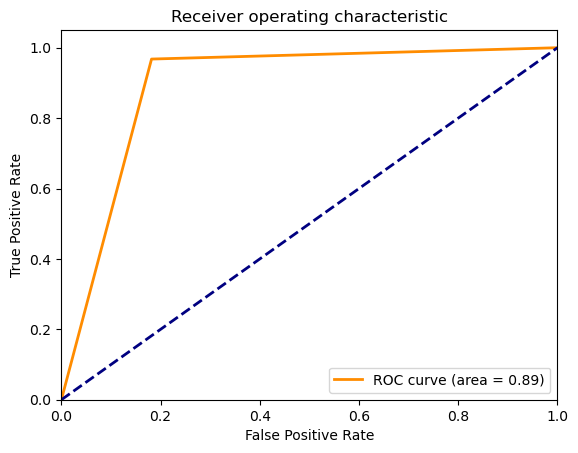

In [68]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [69]:
auc_score = roc_auc_score(y_test, y_pred_xgb)

print("AUC score:", auc_score)

AUC score: 0.8930284825193295


Permutation explainer: 500it [00:30, 11.03it/s]                                 


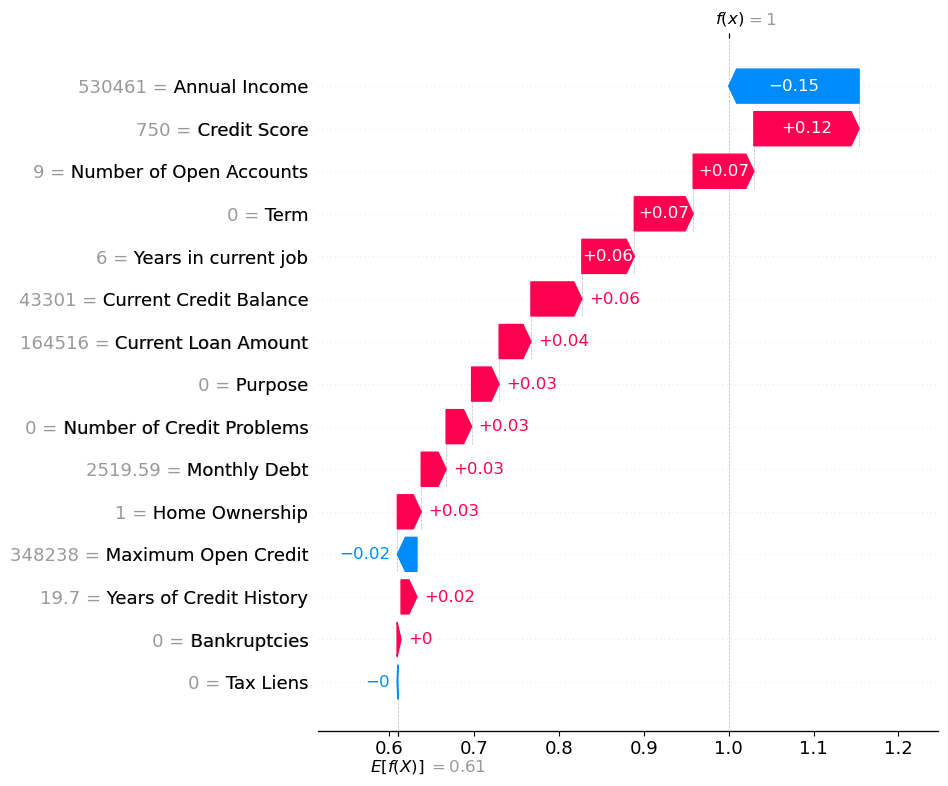

                      feature  contribution  base_value
0         Current Loan Amount      0.037500        0.61
1                        Term      0.069375        0.61
2                Credit Score      0.124063        0.61
3               Annual Income     -0.153750        0.61
4        Years in current job      0.061875        0.61
5              Home Ownership      0.028125        0.61
6                     Purpose      0.032500        0.61
7                Monthly Debt      0.029375        0.61
8     Years of Credit History      0.018750        0.61
9     Number of Open Accounts      0.071563        0.61
10  Number of Credit Problems      0.030000        0.61
11     Current Credit Balance      0.060000        0.61
12        Maximum Open Credit     -0.023125        0.61
13               Bankruptcies      0.004688        0.61
14                  Tax Liens     -0.000937        0.61


In [70]:
explainer_xgb = shap.Explainer(xgb.predict, x_test[1:500])
shap_values_xgb = explainer_xgb(x_test[1:500])
shap.waterfall_plot(shap_values_xgb[165], max_display=20)

# extract the data used to create the plot
feature_names_xgb = shap_values_xgb.feature_names
contribution_xgb = shap_values_xgb.values[165]
base_value_xgb = shap_values_xgb.base_values[165]

# create a pandas DataFrame
data_xgb = {
    'feature': feature_names_xgb,
    'contribution': contribution_xgb,
    'base_value': base_value_xgb
}
df_xgb = pd.DataFrame(data_xgb)
print(df_xgb)

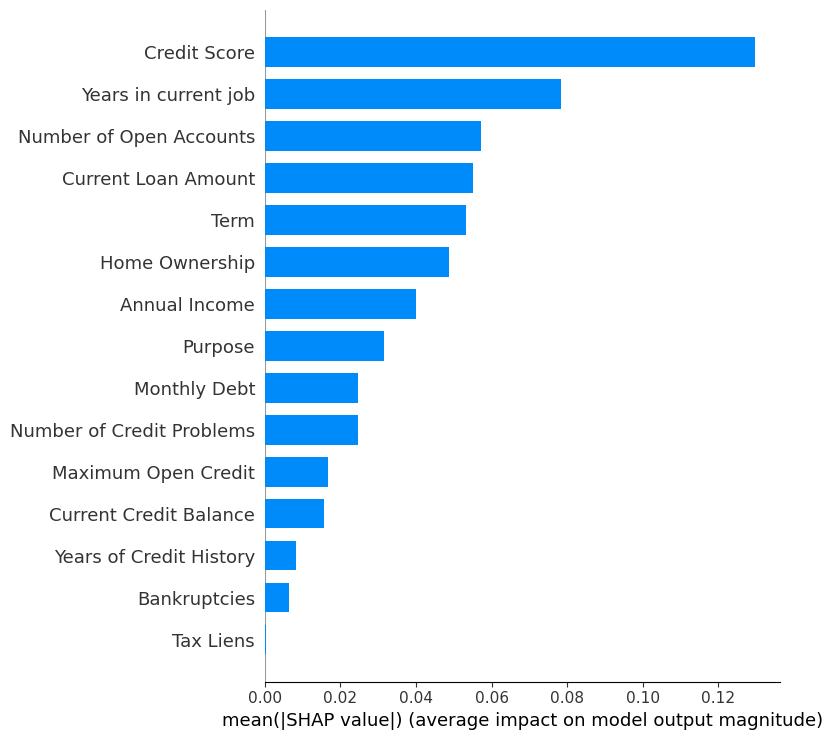

In [71]:
shap.summary_plot(shap_values_xgb, x_test, plot_type="bar")

In [72]:
total_contribution_xgb=np.sum(contribution_xgb)
print(total_contribution_xgb)

0.39000000000000007


In [73]:
predicted_value_xgb=base_value_xgb + total_contribution_xgb
print(predicted_value_xgb)

1.0


## Lightgbm

In [74]:
train_data = lgb.Dataset(x_train, label=y_train)

In [75]:
model = lgb.LGBMClassifier(learning_rate=0.6,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')
y_pred = model.predict(x_test)
print(y_pred)

[20]	training's binary_logloss: 0.232473	valid_0's binary_logloss: 0.259205


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[40]	training's binary_logloss: 0.205776	valid_0's binary_logloss: 0.260789
[60]	training's binary_logloss: 0.253368	valid_0's binary_logloss: 0.342525
[80]	training's binary_logloss: 0.265606	valid_0's binary_logloss: 0.33359
[100]	training's binary_logloss: 0.234782	valid_0's binary_logloss: 0.336662
[1. 1. 1. ... 1. 1. 1.]


In [76]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88     11869
         1.0       0.84      0.96      0.90     11860

    accuracy                           0.89     23729
   macro avg       0.90      0.89      0.89     23729
weighted avg       0.90      0.89      0.89     23729



In [77]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88     11869
         1.0       0.84      0.96      0.90     11860

    accuracy                           0.89     23729
   macro avg       0.90      0.89      0.89     23729
weighted avg       0.90      0.89      0.89     23729



In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

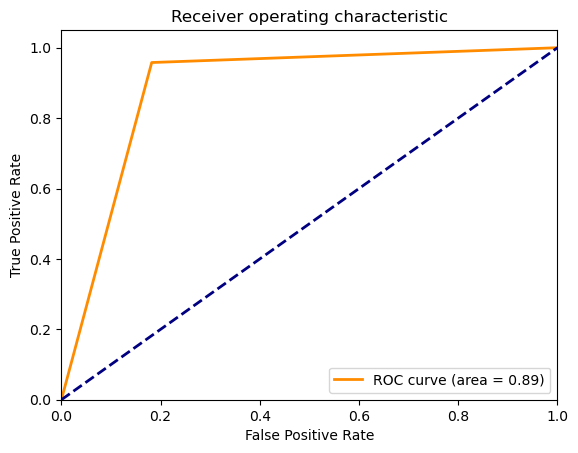

In [79]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [80]:
auc_score = roc_auc_score(y_test, y_pred)

print("AUC score:", auc_score)

AUC score: 0.8879274299523594


In [81]:
explainer_lgb = shap.Explainer(model.predict, x_test[1:500])
shap_values_lgb = explainer_lgb(x_test[1:500])

Permutation explainer: 500it [00:35, 10.25it/s]                                 


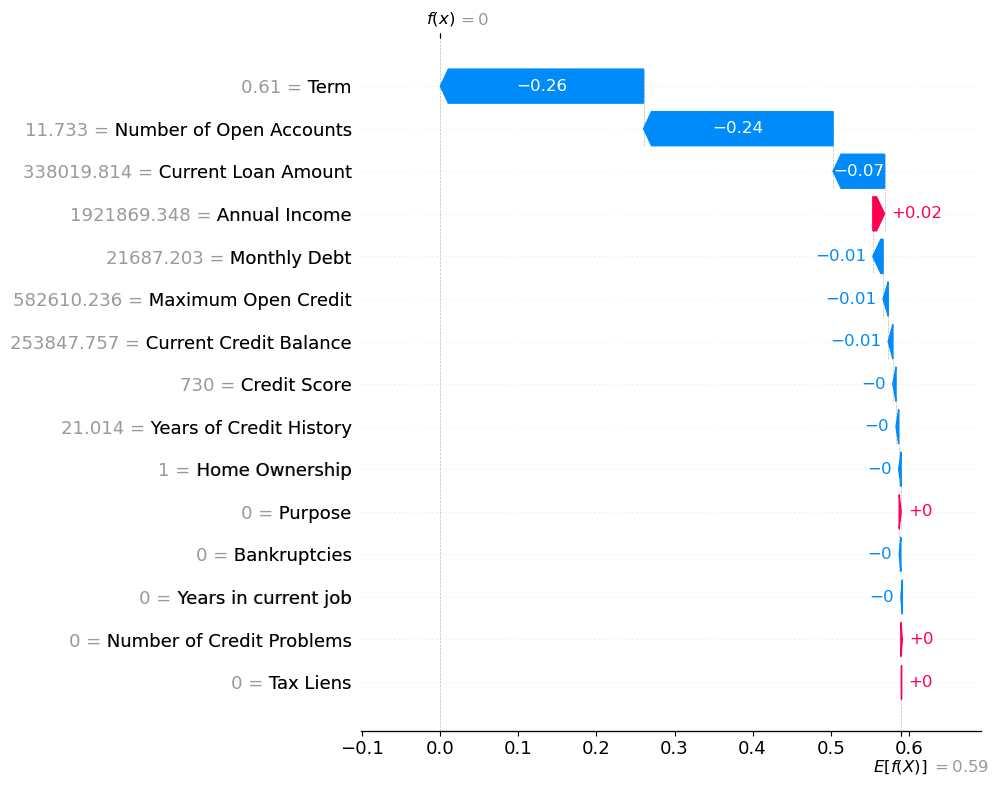

                                             feature  contribution  \
Current Loan Amount              Current Loan Amount     -0.065938   
Term                                            Term     -0.260312   
Credit Score                            Credit Score     -0.004063   
Annual Income                          Annual Income      0.015000   
Years in current job            Years in current job     -0.001875   
Home Ownership                        Home Ownership     -0.003125   
Purpose                                      Purpose      0.002500   
Monthly Debt                            Monthly Debt     -0.013125   
Years of Credit History      Years of Credit History     -0.003438   
Number of Open Accounts      Number of Open Accounts     -0.242812   
Number of Credit Problems  Number of Credit Problems      0.001875   
Current Credit Balance        Current Credit Balance     -0.005938   
Maximum Open Credit              Maximum Open Credit     -0.006562   
Bankruptcies        

In [82]:
shap.waterfall_plot(shap_values_lgb[36], max_display=20)

# extract the data used to create the plot
feature_names_lgb = shap_values_lgb.feature_names
contribution_lgb = shap_values_lgb.values[36]
value_lgb = x_test.iloc[37]
base_value_lgb = shap_values_lgb.base_values[36]

# create a pandas DataFrame
data_lgb= {
    'feature': feature_names_lgb,
    'contribution': contribution_lgb,
    'value': value_lgb,
    'base_value': base_value_lgb
}
df_lgb = pd.DataFrame(data_lgb)
print(df_lgb)

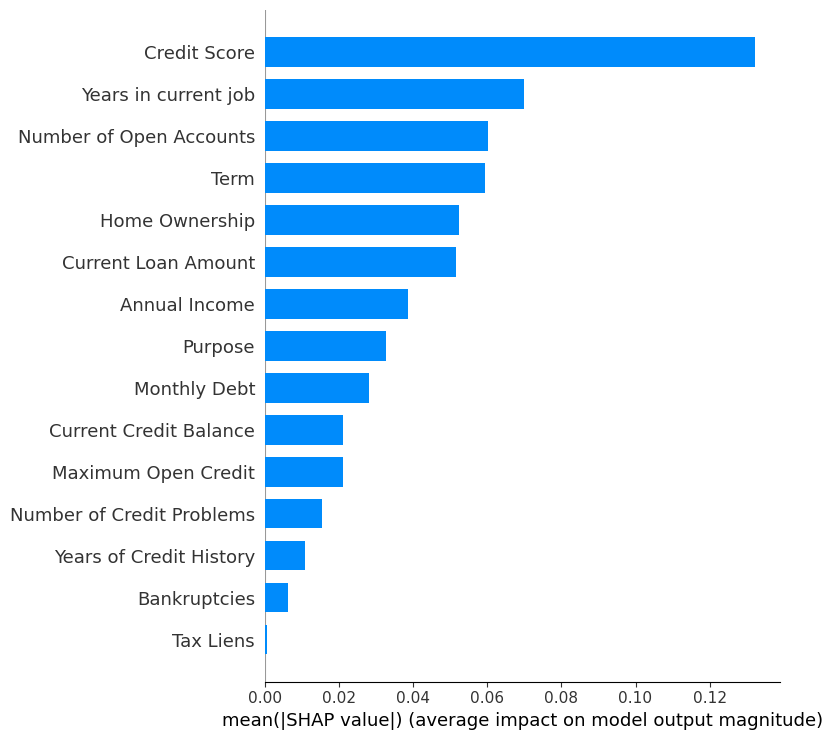

In [83]:
shap.summary_plot(shap_values_lgb, x_test, plot_type="bar")

In [84]:
total_contribution_lgb=np.sum(contribution_lgb)
print(total_contribution_lgb)

-0.59


In [85]:
predicted_value_lgb=base_value_lgb + total_contribution_lgb
print(predicted_value_lgb)

0.0


In [86]:
result=[]
result_max=[]
result_feature=[]
if(predicted_value_lgb <=0):
    min_3_values = df_lgb.nsmallest(3, 'contribution')
    max_values = df_lgb.nlargest(1, 'contribution')
    
    selected_value=min_3_values[['feature', 'contribution','value']]
    df_selected=pd.DataFrame(selected_value)

    
    df_selected['percentage']= df_selected['contribution'].apply(lambda x:(x/total_contribution_lgb) * 100)
    print(df_selected)
    
    condition = df_selected.loc[df_selected['percentage'] >=10]
    
    for index, row in condition.iterrows():
        feature_variables=row['feature']
        result.append(feature_variables)
        
    for index, row in max_values.iterrows():
        feature_variable=row['feature']
        result_max.append(feature_variable)

    print('\n')   
    print("We are sorry to inform you that you are not elligible for the loan at the moment")
    print(f"Though you are having a good {result_max[0]}")
    print("Due to the following issues your loan got rejected:",',' .join([str(lst) for lst in result]))
    print("If you have any questions or concerns about our decision, please do not hesitate to reach out to us.")
    
else:
    max_3_values = df_lgb.nlargest(3, 'contribution')
    
    selected_value=max_3_values[['feature', 'contribution','value']]
   
    df_selected_max=pd.DataFrame(selected_value)
    df_selected_max['percentage']= df_selected_max['contribution'].apply(lambda x:(x/total_contribution_lgb) * 100)
    print(df_selected_max)

    for index, row in max_3_values.iterrows():
        feature_variables=row['feature']
        result.append(feature_variables)
        
    print('\n')    
    print("Congrats You are eligible for the loan !")
    print("There are severable factors which makes this possible such as:",',' .join([str(lst) for lst in result]))

                                         feature  contribution          value  \
Term                                        Term     -0.260312       0.609555   
Number of Open Accounts  Number of Open Accounts     -0.242812      11.733114   
Current Loan Amount          Current Loan Amount     -0.065938  338019.814083   

                         percentage  
Term                      44.120763  
Number of Open Accounts   41.154661  
Current Loan Amount       11.175847  


We are sorry to inform you that you are not elligible for the loan at the moment
Though you are having a good Annual Income
Due to the following issues your loan got rejected: Term,Number of Open Accounts,Current Loan Amount
If you have any questions or concerns about our decision, please do not hesitate to reach out to us.


In [87]:
def shap_predictor(value):
        sample=pd.DataFrame({'Current Loan Amount':[value["Current Loan Amount"]],'Term':[value["Term"]],'Credit Score':[value["Credit Score"]], 'Annual Income':[value['Annual Income']], 'Years in current job':[value['Years in current job']]
                    , 'Home Ownership':[value['Home Ownership']], 'Purpose':[value['Purpose']], 'Monthly Debt':[value['Monthly Debt']],'Years of Credit History':[value['Years of Credit History']], 
                     'Number of Open Accounts':[value['Number of Open Accounts']]
                    , 'Number of Credit Problems':[value['Number of Credit Problems']], 'Current Credit Balance':[value['Current Credit Balance']], 'Maximum Open Credit':[value['Maximum Open Credit']], 'Bankruptcies':[value['Bankruptcies']],
                     'Tax Liens':[value['Tax Liens']] })
        
        sample.to_excel('my_variable.xlsx', index=False)
        df=pd.read_excel("my_variable.xlsx")
           
        background = shap.maskers.Independent(x_test, max_samples=50)
        explainer = shap.Explainer(model.predict, background)
        shap_values = explainer(df)
        shap.plots.waterfall(shap_values[0], max_display=20)
                
        feature_names = shap_values.feature_names
        feature_values = df.iloc[0]
        contribution = shap_values.values[0]
        base_value = shap_values.base_values[0]

    # create a pandas DataFrame
        data = {
            'feature': feature_names,
            'value': feature_values,
            'contribution': contribution,
            'base_value': base_value
        }
        data = pd.DataFrame(data)
        total_contribution=np.sum(contribution)        
        predicted_value=base_value + total_contribution
        return predicted_value,data,total_contribution,sample,df
    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://172.20.10.5:2000/ (Press CTRL+C to quit)
172.20.10.5 - - [06/Apr/2023 14:40:42] "GET / HTTP/1.1" 200 -


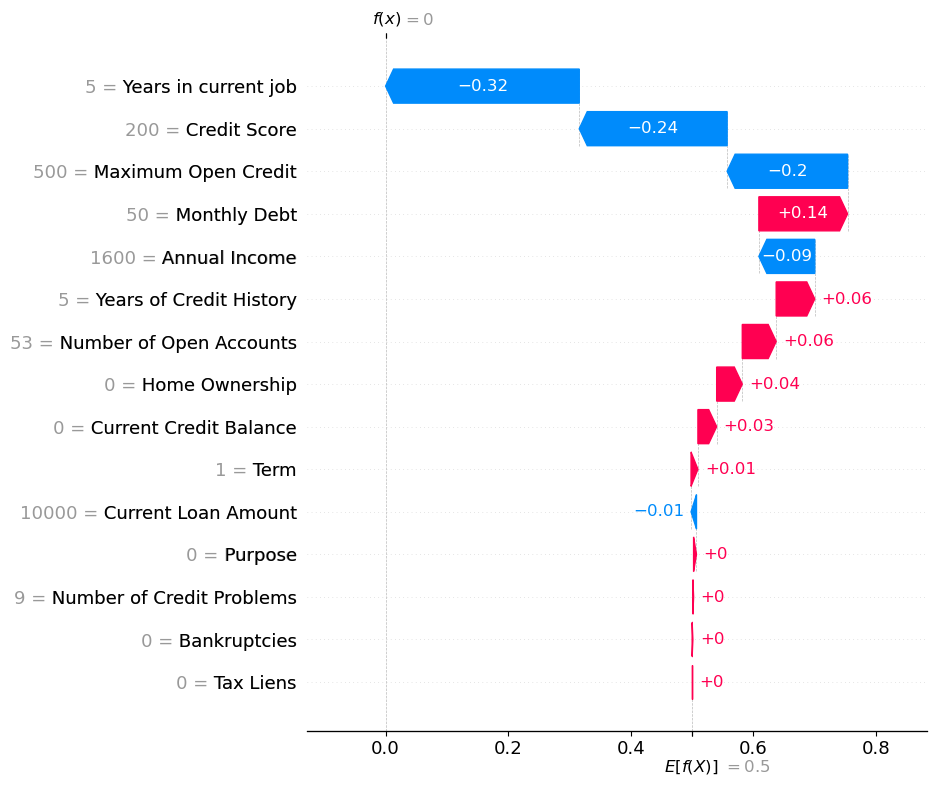

172.20.10.5 - - [06/Apr/2023 14:41:22] "POST / HTTP/1.1" 200 -


                                             feature  value  contribution  \
Current Loan Amount              Current Loan Amount  10000     -0.008824   
Term                                            Term      1      0.011176   
Credit Score                            Credit Score    200     -0.241176   
Annual Income                          Annual Income   1600     -0.091176   
Years in current job            Years in current job      5     -0.315882   
Home Ownership                        Home Ownership      0      0.041765   
Purpose                                      Purpose      0      0.004706   
Monthly Debt                            Monthly Debt     50      0.144706   
Years of Credit History      Years of Credit History      5      0.062941   
Number of Open Accounts      Number of Open Accounts     53      0.055294   
Number of Credit Problems  Number of Credit Problems      9      0.001176   
Current Credit Balance        Current Credit Balance      0      0.030588   

In [88]:
import os
from flask import *
from flask import request, render_template
import json
import shap

app = Flask(__name__)

#model=pickle.load(open('model.pk1','rb'))

@app.route("/", methods=["GET", "POST"])

def home():
    message = ""
    message1 = ""
    message2 = ""
    message3 = ""
    message4 = ""
    message5 = ''
    message6 = ''
    message7 = ''
    message8 = ''
    if request.method == "POST":      
        data=request.form.to_dict()
        json_data_dump=json.dumps(data)
        json_data=json.loads(json_data_dump)
        value = json.loads(json_data_dump)
            
        result=[]
        result_max=[]
        predicted_value,data,total_contribution,sample,df=shap_predictor(value)
        print(data)
        
        if(predicted_value <=0):
            print('a')
            min_3_values = data.nsmallest(3, 'contribution')
            max_values = data.nlargest(1, 'contribution')
            
            selected_value=min_3_values[['feature', 'contribution','value']]
            df_selected=pd.DataFrame(selected_value)
            
            df_selected['percentage']= df_selected['contribution'].apply(lambda x:(x/total_contribution) * 100)
            print(df_selected)

            condition = df_selected.loc[df_selected['percentage'] >=10]
            
            for index, row in condition.iterrows():
                feature_variables=row['feature']
                result.append(feature_variables)
        
            for index, row in max_values.iterrows():
                feature_variable=row['feature']
                result_max.append(feature_variable)
                
            message = "we are sorry to inform that you are not eligible for the loan"
            message1=f"Though you are having a good score in {result_max[0]}"
            response = jsonify(','.join([str(lst) for lst in result]))
            message2="Due to the following issues your loan got rejected:" + response.get_data(as_text=True)
            message3="If you have any questions or concerns about our decision, please do not hesitate to reach out to us."
           
            if "Annual Income" in df_selected["feature"].values:
                    my_x = df.iloc[0]
                    ranges = []
                    start = end = None  # initialize start and end variables
                    for i in range(170981, 180000):
                        my_x["Annual Income"] = i
                        my_pred = model.predict([my_x])
                        if my_pred == 1:
                            if end is not None and i == end + 1:
                                end = i  # extend the current range
                            else:
                                if start is not None:
                                    if start == end:
                                        ranges.append(str(start))
                                    else:
                                        ranges.append(str(start) + "-" + str(end))
                                start = end = i  # start a new range
                    if start is not None:
                        if start == end:
                            ranges.append(str(start))
                        else:
                            ranges.append(str(start) + "-" + str(end))
                        if len(ranges) > 1 and ranges[0] == str(start):
                            ranges = ranges[1:]  # exclude the first value of the first range if it is the same as the starting value of the range
                        message4= "Annual income ranges for positive prediction are:", ", ".join(ranges)
                     

                    if df_selected["feature"].values[0] == "Monthly Debt":
                        my_x = df.iloc[0]
                        ranges_m = []
                        start = end = None  # initialize start and end variables
                        for j in range(0,10000):
                            my_x["Monthly Debt"] = j
                            my_pred = model.predict([my_x])
                            if my_pred == 1:
                                if end is not None and j == end + 1:
                                    end = j  # extend the current range
                                else:
                                    if start is not None:
                                        if start == end:
                                            ranges_m.append(str(start))
                                        else:
                                            ranges_m.append(str(start) + "-" + str(end))
                                    start = end = j  # start a new range
                        if start is not None:
                            if start == end:
                                ranges_m.append(str(start))
                            else:
                                ranges_m.append(str(start) + "-" + str(end))
                            if len(ranges_m) > 1 and ranges_m[0] == str(start):
                                ranges_m = ranges_m[1:]  # exclude the first value of the first range if it is the same as the starting value of the range
                            message5 = "Monthly Debt ranges for positive prediction are:", ", ".join(ranges_m)
                            
                    if df_selected["feature"].values[0] == "Credit Score":
                        my_x = df.iloc[0]
                        ranges_c = []
                        start = end = None  # initialize start and end variables
                        for k in range(550,900):
                            my_x["Credit Score"] = k
                            my_pred = model.predict([my_x])
                            if my_pred == 1:
                                if end is not None and k == end + 1:
                                    end = k  # extend the current range
                                else:
                                    if start is not None:
                                        if start == end:
                                            ranges_c.append(str(start))
                                        else:
                                            ranges_c.append(str(start) + "-" + str(end))
                                    start = end = k  # start a new range
                        if start is not None:
                            if start == end:
                                ranges_c.append(str(start))
                            else:
                                ranges_c.append(str(start) + "-" + str(end))
                            if len(ranges_c) > 1 and ranges_c[0] == str(start):
                                ranges_c = ranges_c[1:]  # exclude the first value of the first range if it is the same as the starting value of the range
                            message6 = "Credit Score ranges for positive prediction are:", ", ".join(ranges_c)
                        

                    if df_selected["feature"].values[0] == "Number of Open Accounts":
                        my_x = df.iloc[0]
                        ranges_n = []
                        start = end = None  # initialize start and end variables
                        for l in range(0,70):
                            my_x["Number of Open Accounts"] = l
                            my_pred = model.predict([my_x])
                            if my_pred == 1:
                                if end is not None and l == end + 1:
                                    end = l  # extend the current range
                                else:
                                    if start is not None:
                                        if start == end:
                                            ranges_n.append(str(start))
                                        else:
                                            ranges_n.append(str(start) + "-" + str(end))
                                    start = end = l  # start a new range
                        if start is not None:
                            if start == end:
                                ranges_n.append(str(start))
                            else:
                                ranges_n.append(str(start) + "-" + str(end))
                            if len(ranges_c) > 1 and ranges_c[0] == str(start):
                                ranges_n = ranges_n[1:]  # exclude the first value of the first range if it is the same as the starting value of the range
                            message7 = "Number of Open Accounts ranges for positive prediction are:", ", ".join(ranges_n)
                            message8 = "" 
       
        else:
            print("b")
            max_3_values = data.nlargest(3, 'contribution')

            selected_value=max_3_values[['feature', 'contribution']]
            df_selected_max=pd.DataFrame(selected_value)
            
            df_selected_max['percentage']= df_selected_max['contribution'].apply(lambda x:(x/total_contribution) * 100)
            print(df_selected_max)
            
            X=df_selected_max.iloc[0]
            print(X)

            for index, row in max_3_values.iterrows():
                feature_variables=row['feature']
                result.append(feature_variables)
            message = "Congrats! you are elligible for the loan"
            response = jsonify(','.join([str(lst) for lst in result]))
            message1="There are severable factors which makes this possible such as:" + response.get_data(as_text=True)
            message2 = 'The results are based on the values provided any changes will vary the result'
            message3 = 'Please reach out to the bank for further proceedings'
            message4 = ''
            message5 = ''
            message6 = ''
            message7 = ''
            message8 = ''

            
        if predicted_value: 
            return render_template("home.html",index=predicted_value,message = message,message1 = message1, 
                                   message2 = message2, message3=message3,message4 = message4,
                                  message5 = message5,message6=message6,message7=message7,message8=message8)
    return render_template("home.html")
            
    

if __name__ == "__main__":
    #app.debug= True
    app.run(host='0.0.0.0', port=2000)
